# LOADING LIBRARY

In [8]:
import pandas as pd
import numpy as np
import pandas_profiling as pp 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('datasets_474_966_haberman.csv',header=None, names = ['Age', 'Year_of_Treatment', 'Positive_Lymph_nodes', 'Surv_status'])

## DATA CLEANING AND PROCESSING

In [4]:
data.head()

,Age,Year_of_Treatment,Positive_Lymph_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
data.isna().sum()

Age                     0
Year_of_Treatment       0
Positive_Lymph_nodes    0
Surv_status             0
dtype: int64

there is no null values on above 

In [6]:
pp.ProfileReport(data)

## EDA PLOTTING

In [7]:
data.describe()

,Age,Year_of_Treatment,Positive_Lymph_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### SCATTER PLOT

In [13]:
data['Surv_status'] = data['Surv_status'].map({1:"yes", 2:"no"})

data['Surv_status'] = data['Surv_status'].astype('category', copy=False)

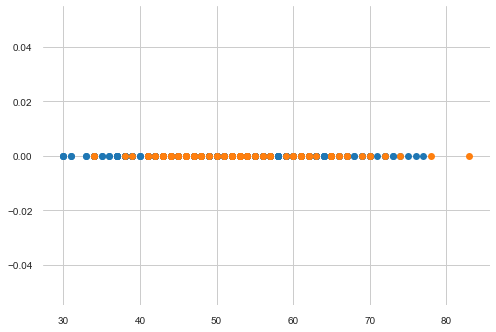

In [14]:
sns.set_style('whitegrid')
survived = data.loc[data['Surv_status'] == 'yes'];
dead = data.loc[data['Surv_status'] == 'no'];

plt.plot(survived['Age'],
        np.zeros_like(survived['Age']), 'o')

plt.plot(dead['Age'],
        np.zeros_like(dead['Age']), 'o')

plt.show()

## HISTOGRAM PLOT

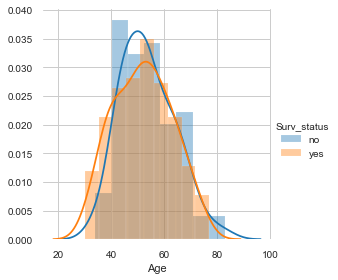

In [16]:
# Histogram for Age column
sns.FacetGrid(data, hue='Surv_status', height=4) \
    .map(sns.distplot, 'Age') \
    .add_legend();
plt.show();

From the above figure, there is much overlapping between the patients who survived and the patients who couldn't based on the patient's age.

So, we can't determine the survival of patient based on his age.

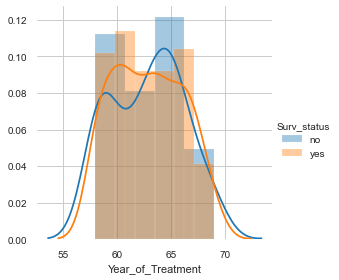

In [17]:
# Histogram for 'Year_of_Treatment' column
sns.FacetGrid(data, hue='Surv_status', height=4) \
    .map(sns.distplot, 'Year_of_Treatment') \
    .add_legend();
plt.show();


From the above figure also, there is much overlapping between the patients who survived and the patients who couldn't based on the patient's year of treatment.
So, we can't determine the survival of patient based on his year of treatment.

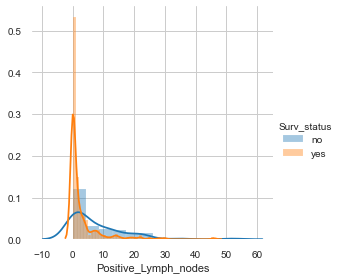

In [18]:
# Histogram for 'Positive_Lymph_nodes' column
sns.FacetGrid(data, hue='Surv_status', height=4) \
    .map(sns.distplot, 'Positive_Lymph_nodes') \
    .add_legend();
plt.show();

Now from this figure, if no of positive_lymph_nodes <= 3 then there is more chances that the patient would survive.

Here the probability distribution function (PDF) for the survived patient is high as compared to the patient who died.

## CDF PLOT

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


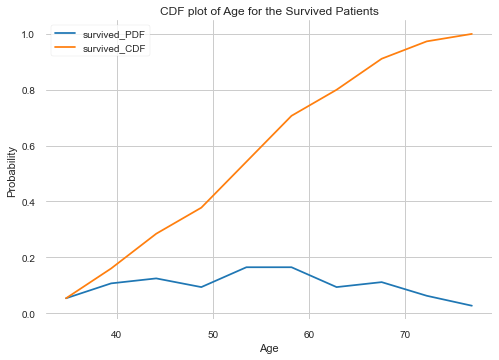

In [20]:
#CDF and PDF plot of  Age column for survived patients.

counts, bin_edges = np.histogram(survived['Age'], bins=10,
                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['survived_PDF', 'survived_CDF'])
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('CDF plot of Age for the Survived Patients')

plt.show()

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


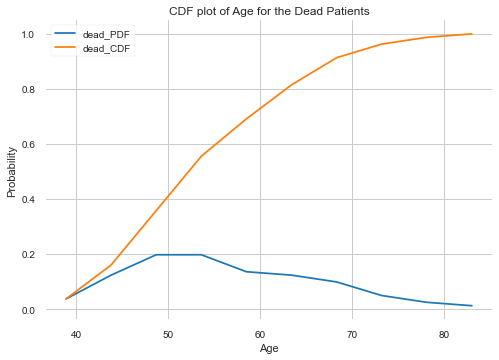

In [21]:
#CDF and PDF plot of  Age column for survived patients.

counts, bin_edges = np.histogram(dead['Age'], bins=10,
                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['dead_PDF', 'dead_CDF'])
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('CDF plot of Age for the Dead Patients')
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


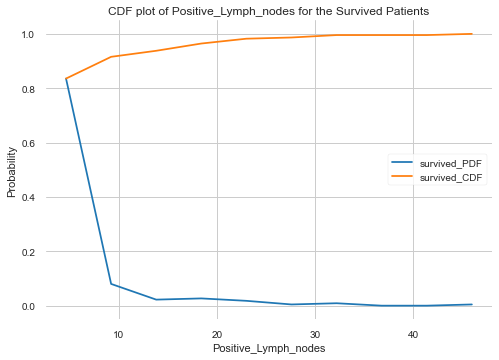

In [22]:
#CDF and PDF plot of  Positive_Lymph_nodes column for survived patients.

counts, bin_edges = np.histogram(survived['Positive_Lymph_nodes'], bins=10,
                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['survived_PDF', 'survived_CDF'])
plt.xlabel('Positive_Lymph_nodes')
plt.ylabel('Probability')
plt.title('CDF plot of Positive_Lymph_nodes for the Survived Patients')

plt.show()

100% of the survived patient had less than 40 positive_lymph_nodes.

and 90% had less than 10 positive_lymph_nodes.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


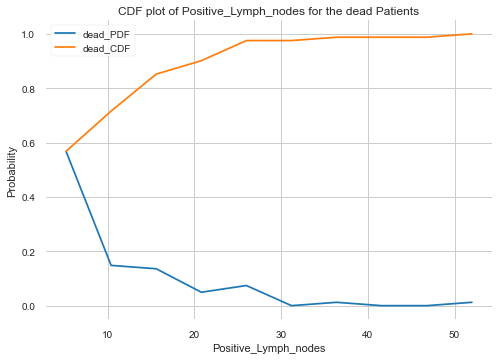

In [23]:
#CDF and PDF plot of  Positive_Lymph_nodes column for dead patients.

counts, bin_edges = np.histogram(dead['Positive_Lymph_nodes'], bins=10,
                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['dead_PDF', 'dead_CDF'])
plt.xlabel('Positive_Lymph_nodes')
plt.ylabel('Probability')
plt.title('CDF plot of Positive_Lymph_nodes for the dead Patients')

''''counts, bin_edges = np.histogram(dead['Positive_Lymph_nodes'], bins=20,
                                density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:], pdf)'''

plt.show()


70% of the dead patients had less than 10 positive_lymph_nodes.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


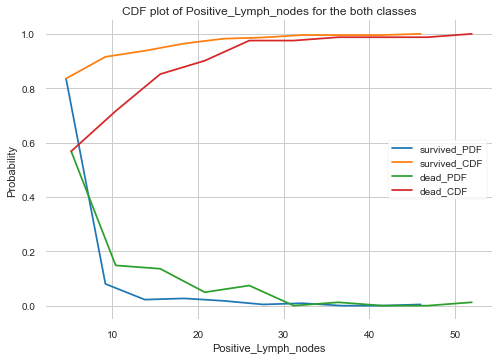

In [25]:
#CDF and PDF plot of  Positive_Lymph_nodes column for survived patients.

counts, bin_edges = np.histogram(survived['Positive_Lymph_nodes'], bins=10,
                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)


#CDF and PDF plot of  Positive_Lymph_nodes column for dead patients.

counts, bin_edges = np.histogram(dead['Positive_Lymph_nodes'], bins=10,
                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['survived_PDF', 'survived_CDF', 'dead_PDF', 'dead_CDF'])
plt.xlabel('Positive_Lymph_nodes')
plt.ylabel('Probability')
plt.title('CDF plot of Positive_Lymph_nodes for the both classes')

''''counts, bin_edges = np.histogram(dead['Positive_Lymph_nodes'], bins=20,
                                density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:], pdf)'''

plt.show()

### MEAN and STD var

In [26]:
print(np.mean(survived['Positive_Lymph_nodes']))
print(np.mean(dead['Positive_Lymph_nodes']))

print("\nStd-Dev:")
print(np.std(survived['Positive_Lymph_nodes']))
print(np.std(dead['Positive_Lymph_nodes']))

2.7911111111111113
7.45679012345679

Std-Dev:
5.857258449412138
9.128776076761635


## Box Plots

Box plot takes a less space and visually represents the five number summary of the data points in a box.

The outliers are displayed as points outside the box.

Q1 -- 1.5*IQR
Q1 (25th percentile)
Q2 (50th percentile or median)
Q3 (75th percentile)
Q3 + 1.5*IQR
Inter Quartile Range = Q3-Q1

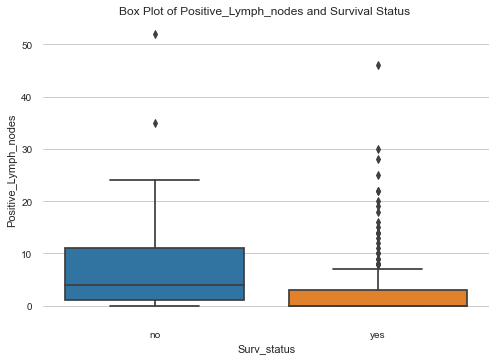

In [28]:
sns.boxplot(x='Surv_status', y='Positive_Lymph_nodes', data=data).set_title('Box Plot of Positive_Lymph_nodes and Survival Status ')  
plt.show()

75% of survived Patients had positive_lymph_nodes less than 2.

25% of dead patients had positive_lymph_nodes less than 1, while 50% of dead patient had positive_lymph_nodes less than 3.

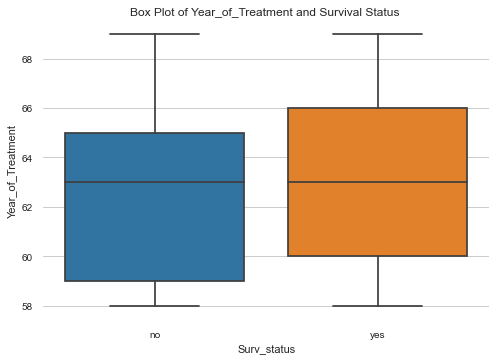

In [30]:
sns.boxplot(x='Surv_status', y='Year_of_Treatment', data=data).set_title('Box Plot of Year_of_Treatment and Survival Status ')  
plt.show()

# Voilin Plots

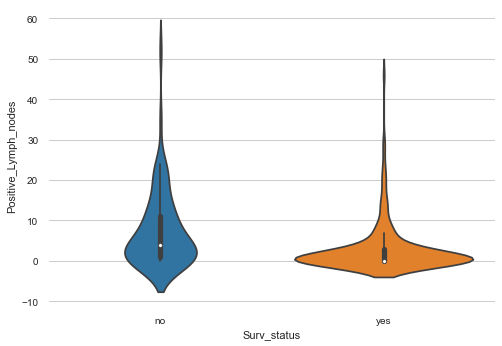

In [31]:
sns.violinplot(x='Surv_status', y='Positive_Lymph_nodes', data=data, size=8)
plt.show()


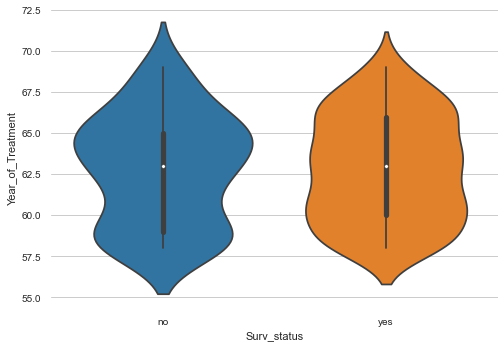

In [32]:
sns.violinplot(x='Surv_status', y='Year_of_Treatment', data=data, size=8)
plt.show()

# 2-D scatter plot

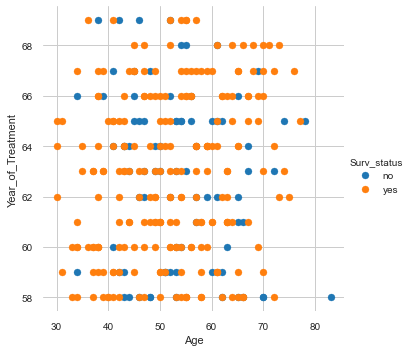

In [34]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='Surv_status', height=5) \
    .map(plt.scatter, 'Age', 'Year_of_Treatment') \
    .add_legend()
plt.show()

Observations:
    
By scattering the data points between Year_of_Treatment and Age, we can see the much overlapping between the two classes

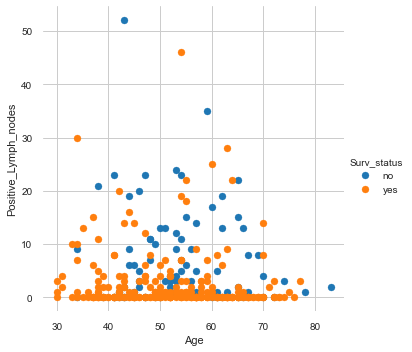

In [35]:
sns.FacetGrid(data, hue='Surv_status', height=5) \
    .map(plt.scatter, 'Age', 'Positive_Lymph_nodes') \
    .add_legend()
plt.show()

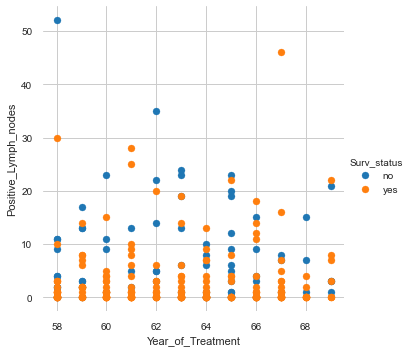

In [36]:
sns.FacetGrid(data, hue='Surv_status', height=5) \
    .map(plt.scatter, 'Year_of_Treatment', 'Positive_Lymph_nodes') \
    .add_legend()
plt.show()

Observations:
By scattering the data points between Year_of_Treatment and Positive_lymph_nodes, we can see the better seperation between the two classes than the others.

### Pair Plots

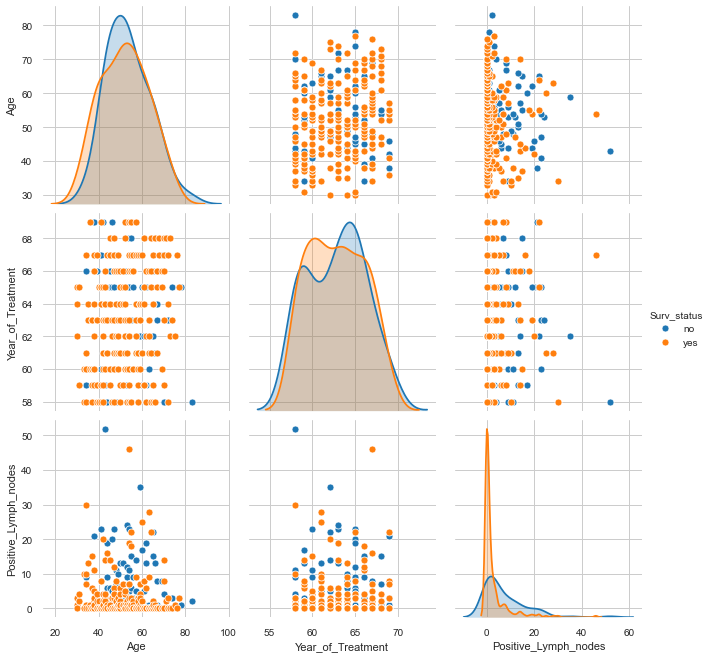

In [38]:
sns.set_style('whitegrid')
sns.pairplot(data, hue='Surv_status', height=3);
plt.show()


## Contour Plot

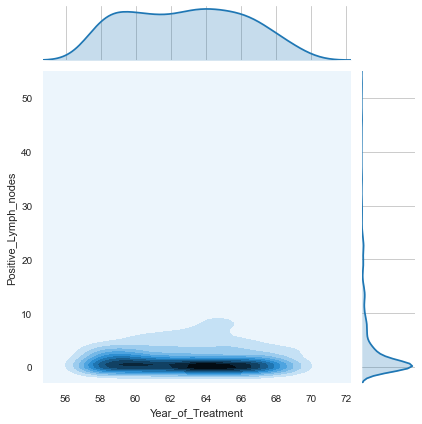

In [39]:
sns.jointplot(x='Year_of_Treatment', y='Positive_Lymph_nodes', data=data, kind='kde');
plt.show()

# Conclusion

By plotting all the necessary tools (pdf, cdf, box-plot, pair-plot etc.)

we conclude that if number of positive_lymph_nodes is less, than there is more probability of the survival of patients.

On the basis of ages of the patients we can say that if the age of the patient is less than 40, then his survival rate is probabily high
.
for further detailed analysis more feature columns of data set is required.